#### On toymodules.
Compared to the sgan code, the toymodules dont have any type of pooling, i.e. the network does not know that agents are together in a scene. A very big __difference__ of __sgan__ and __toymodules__ to our __initial way to implement the modules__ is that the generator only __generates displacements__ and __loss is computed on displacements__.

#### Other remarks.
I renamed some variables for clarifying things:

- obs_taj -> xy_in
- obs_traj_rel -> dxdy_in
- pred_taj -> xy_out
- pred_traj_rel -> dxdy_out
- obs_len -> in_len
- pred_len -> out_len

Moreover, I commented some parts in sgan code and our code starting with "Important" and "Questions". In Pycharm you can go to Settings -> TODO and then create new keywords as TODO that will be highlighted in different colors. Thats super nice.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import Solver, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir)

In [3]:
generator = ToyGenerator(obs_len=8, pred_len=12)
discriminator = ToyDiscriminator()
models = {'discriminator': discriminator, 'generator': generator} # lmk if too cumbersome to pass both in a dict

In [24]:
solver = Solver(models=models,  # pls read the code and docstrings to get the idea
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-2}, 'discriminator': {'lr': 0}})

In [31]:
solver.train(trainloader, num_epochs = 100, checkpoint_every=5, steps = {'generator': 1, 'discriminator': 1})

G_gan: 0.488	G_norm: 0.098	G_total: 0.586	D_real: 0.264	D_fake: 1.009	D_total: 1.273	D_real: 0.264	D_fake: 1.009	D_total: 1.273	
G_gan: 0.356	G_norm: 0.138	G_total: 0.494	D_real: 0.572	D_fake: 1.238	D_total: 1.810	D_real: 0.572	D_fake: 1.238	D_total: 1.810	
G_gan: 0.564	G_norm: 0.141	G_total: 0.704	D_real: 0.190	D_fake: 1.130	D_total: 1.320	D_real: 0.190	D_fake: 1.130	D_total: 1.320	
G_gan: 0.384	G_norm: 0.120	G_total: 0.504	D_real: 0.379	D_fake: 1.050	D_total: 1.429	D_real: 0.379	D_fake: 1.050	D_total: 1.429	
G_gan: 0.374	G_norm: 0.120	G_total: 0.494	D_real: 0.504	D_fake: 1.084	D_total: 1.589	D_real: 0.504	D_fake: 1.084	D_total: 1.589	
G_gan: 0.214	G_norm: 0.118	G_total: 0.331	D_real: 0.637	D_fake: 1.157	D_total: 1.793	D_real: 0.637	D_fake: 1.157	D_total: 1.793	
G_gan: 0.560	G_norm: 0.123	G_total: 0.683	D_real: 0.202	D_fake: 1.167	D_total: 1.369	D_real: 0.202	D_fake: 1.167	D_total: 1.369	
G_gan: 0.237	G_norm: 0.117	G_total: 0.354	D_real: 0.495	D_fake: 1.175	D_total: 1.670	D_real: 0.49

#### Visualize things.
As we talked about, I implemented a simple plotting class that is supposed to integrate with the rest. E.g. vis.loss takes the dictionary 'solver.train_loss_history' of the solver object to plot all losses.
- For everything that you would like to visualize, think about how we could implement it in the class Visualization.

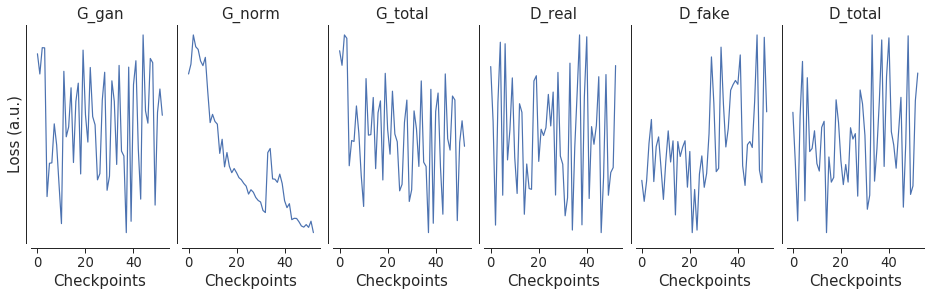

In [53]:
vis = Visualization()
vis.loss(solver.train_loss_history)